# Simulation Test

## Introduction

In [7]:
import sys
import os

In [11]:
cwd = os.getcwd()
print(cwd)

/home/rah/workspace/optimal-search/src/ipython


In [8]:
cwd = os.getcwd()

sys.path.append(os.path.join(cwd,'..'))
sys.path.append(os.path.join(cwd,'../simulation'))
sys.path.append(os.path.join(cwd,'../analysis'))
sys.path.append(os.path.join(cwd,'../util'))

In [10]:
import util.simutil as su
import analysis.analysis as an


ModuleNotFoundError: No module named 'util'

In [ ]:
params = su.get_params("../experiments/ER0_1.ini")
results = su.runsim(params)

Slope, intercept: 0.00032311109062351293 0.052454134630750146
R-squared: 0.0007956654067030722
Residual Std Error =  1.6001844465766524


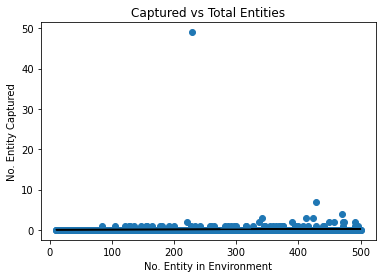

In [ ]:
data = an.extract_data(results)
an.analyse_results(data)